# Algo Trading- Backtrader-Master Template

In this notebook, we will build a backtrader strategy using any trading algorithm

*To do : 8889 port

[1. Step 1 : Loading the algorithm](#1)

[2. Step 2 : Setting, running backtests and plots](#2)

#https://github.com/happydasch/btplotting

In [22]:
import logging
import os
import pandas as pd
from btplotting import BacktraderPlottingLive
import backtrader as bt
import yfinance as yf
import matplotlib.pyplot as plt
import btplotting
import pyfolio as pf

C:\Users\tatsa\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
C:\Users\tatsa\anaconda3\lib\site-packages\pyfolio\pos.py:26: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  warnings.warn(


<a id='1'></a>
## 1. Step 1 : Loading the algorithm
In this step we load a sample TestStrategy which is created separately in a python file.

In [6]:
class TestStrategy(bt.Strategy):
    def log(self, txt, dt=None):
        dt = dt or self.datas[0].datetime.date(0)
        print('%s, %s' % (dt.isoformat(), txt))

    def __init__(self):
        self.dataclose = self.datas[0].close
        self.order = None
        self.buyprice = None
        self.buycomm = None

        self.sma = bt.indicators.SimpleMovingAverage(self.datas[0], period=15)
        self.rsi = bt.indicators.RelativeStrengthIndex()

    def notify_order(self, order):
        if order.status in [order.Submitted, order.Accepted]:
            return

        if order.status in [order.Completed]:
            if order.isbuy():
                self.log(
                    'BUY EXECUTED, Price: %.2f, Cost: %.2f, Comm %.2f' %
                    (order.executed.price,
                     order.executed.value,
                     order.executed.comm))

                self.buyprice = order.executed.price
                self.buycomm = order.executed.comm
            else:  # Sell
                self.log('SELL EXECUTED, Price: %.2f, Cost: %.2f, Comm %.2f' %
                         (order.executed.price,
                          order.executed.value,
                          order.executed.comm))

            self.bar_executed = len(self)

        elif order.status in [order.Canceled, order.Margin, order.Rejected]:
            self.log('Order Canceled/Margin/Rejected')

        # Write down: no pending order
        self.order = None

    def notify_trade(self, trade):
        if not trade.isclosed:
            return

        self.log('OPERATION PROFIT, GROSS %.2f, NET %.2f' %
                 (trade.pnl, trade.pnlcomm))

    def next(self):
        self.log('Close, %.2f' % self.dataclose[0])
        print('rsi:', self.rsi[0])
        if self.order:
            return

        if not self.position:
            if (self.rsi[0] < 30):
                self.log('BUY CREATE, %.2f' % self.dataclose[0])
                self.order = self.buy(size=500)

        else:
            if (self.rsi[0] > 70):
                self.log('SELL CREATE, %.2f' % self.dataclose[0])
                self.order = self.sell(size=500)


<a id='2'></a>
## 2. Step 2 : Backtest outputs and charts
In this step, we set up a backtester, with cash amount, data and strategy name updated.

In [36]:
cerebro = bt.Cerebro()
cerebro.addstrategy(TestStrategy)
cerebro.broker.setcommission(commission=0.001)

datapath = 'FB.csv'

data = bt.feeds.PandasData(dataname=yf.download('GOOG', '2017-01-01', '2022-01-10'))

[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed
Starting Portfolio Value: 100000.00
2017-01-24, Close, 41.19
rsi: 82.03963693140958
2017-01-25, Close, 41.78
rsi: 85.22781165138085
2017-01-26, Close, 41.61
rsi: 80.62976074270675
2017-01-27, Close, 41.17
rsi: 70.36322640040456
2017-01-30, Close, 40.12
rsi: 53.08055021773798
2017-01-31, Close, 39.84
rsi: 49.622416086624575
2017-02-01, Close, 39.78
rsi: 48.94250277902882
2017-02-02, Close, 39.93
rsi: 50.821288994200096
2017-02-03, Close, 40.07
rsi: 52.77530750278832
2017-02-06, Close, 40.07
rsi: 52.66112474702944
2017-02-07, Close, 40.35
rsi: 56.468210061503314
2017-02-08, Close, 40.42
rsi: 57.39239061414219
2017-02-09, Close, 40.48
rsi: 58.19235618285097
2017-02-10, Close, 40.68
rsi: 60.942847499111195
2017-02-13, Close, 40.96
rsi: 64.36456973378931
2017-02-14, Close, 41.02
rsi: 65.08022785944544
2017-02-15, Close, 40.95
rsi: 63.41400995130746
2017-02-16, Close, 41.21
rsi: 66.65394003550992
2017-02-17, Close, 41.40
rs

rsi: 44.77410474211022
2017-04-17, Close, 41.86
rsi: 57.75613269422027
2017-04-18, Close, 41.84
rsi: 57.382521889279126
2017-04-19, Close, 41.91
rsi: 58.529734591555595
2017-04-20, Close, 42.08
rsi: 61.3058186606234
2017-04-21, Close, 42.16
rsi: 62.515552277318235
2017-04-24, Close, 43.14
rsi: 73.74779930869539
2017-04-25, Close, 43.62
rsi: 77.31620623347145
2017-04-26, Close, 43.59
rsi: 76.64576765267704
2017-04-27, Close, 43.71
rsi: 77.57164902772521
2017-04-28, Close, 45.30
rsi: 85.40987250993126
2017-05-01, Close, 45.63
rsi: 86.4712508361502
2017-05-02, Close, 45.82
rsi: 87.06455480649791
2017-05-03, Close, 46.35
rsi: 88.54624258099756
2017-05-04, Close, 46.58
rsi: 89.13062439038971
2017-05-05, Close, 46.36
rsi: 84.57411985713362
2017-05-08, Close, 46.72
rsi: 85.81056414551175
2017-05-09, Close, 46.61
rsi: 83.66516820084092
2017-05-10, Close, 46.44
rsi: 80.22718277507462
2017-05-11, Close, 46.53
rsi: 80.68604184708458
2017-05-12, Close, 46.61
rsi: 81.10634611623338
2017-05-15, Clos

2018-10-29, Close, 51.00
rsi: 32.341174889785364
2018-10-30, Close, 51.81
rsi: 36.07317668654354
2018-10-31, Close, 53.84
rsi: 44.38103049542184
2018-11-01, Close, 53.50
rsi: 43.36793325434962
2018-11-02, Close, 52.89
rsi: 41.526768908312214
2018-11-05, Close, 52.00
rsi: 38.94556082854572
2018-11-06, Close, 52.79
rsi: 42.37162611472079
2018-11-07, Close, 54.67
rsi: 49.646081113536894
2018-11-08, Close, 54.12
rsi: 47.74787290291549
2018-11-09, Close, 53.31
rsi: 45.00764962558559
2018-11-12, Close, 51.93
rsi: 40.743167613566726
2018-11-13, Close, 51.80
rsi: 40.357112971311835
2018-11-14, Close, 52.18
rsi: 42.09983208715267
2018-11-15, Close, 53.24
rsi: 46.73599632977772
2018-11-16, Close, 53.07
rsi: 46.12754589134414
2018-11-19, Close, 51.00
rsi: 39.069480241145925
2018-11-20, Close, 51.29
rsi: 40.432172855902124
2018-11-21, Close, 51.88
rsi: 43.24444016272742
2018-11-23, Close, 51.19
rsi: 40.83868249488081
2018-11-26, Close, 52.43
rsi: 46.60304654775958
2018-11-27, Close, 52.22
rsi: 45.

rsi: 71.0372632693969
2021-01-27, Close, 91.54
rsi: 54.19956429683729
2021-01-28, Close, 93.16
rsi: 58.18956822685449
2021-01-29, Close, 91.79
rsi: 53.90671397274078
2021-02-01, Close, 95.07
rsi: 61.26634353904611
2021-02-02, Close, 96.38
rsi: 63.751552288212984
2021-02-03, Close, 103.50
rsi: 73.66708012092306
2021-02-04, Close, 103.12
rsi: 72.51329666708314
2021-02-05, Close, 104.90
rsi: 74.50325249204296
2021-02-08, Close, 104.65
rsi: 73.68257209201458
2021-02-09, Close, 104.18
rsi: 72.10297756682483
2021-02-10, Close, 104.77
rsi: 72.89322628136884
2021-02-11, Close, 104.79
rsi: 72.92871632243046
2021-02-12, Close, 105.21
rsi: 73.53013333280704
2021-02-16, Close, 106.10
rsi: 74.83326705477884
2021-02-17, Close, 106.42
rsi: 75.30500976717731
2021-02-18, Close, 105.86
rsi: 72.75929041941173
2021-02-19, Close, 105.06
rsi: 69.12164310142575
2021-02-22, Close, 103.24
rsi: 61.62980886430757
2021-02-23, Close, 103.54
rsi: 62.35447940999469
2021-02-24, Close, 104.76
rsi: 65.22944429496414
20

<IPython.core.display.Javascript object>


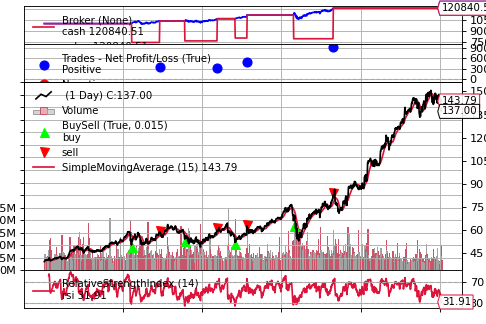

[[<Figure size 432x288 with 5 Axes>]]

In [25]:
cerebro.adddata(data)
cerebro.broker.setcash(100000.0)
#cerebro.addanalyzer(BacktraderPlottingLive)
cerebro.addanalyzer(BacktraderPlottingLive, address="*", port=8889)
cerebro.addanalyzer(bt.analyzers.PyFolio, _name='pyfolio')
print('Starting Portfolio Value: %.2f' % cerebro.broker.getvalue())
results = cerebro.run()
strat = results[0]
pyfoliozer = strat.analyzers.getbyname('pyfolio')
returns, positions, transactions, gross_lev = pyfoliozer.get_pf_items()
print('Final Portfolio Value: %.2f' % cerebro.broker.getvalue())
cerebro.plot()

In [26]:
plot = btplotting.BacktraderPlotting()
cerebro.plot(plot, iplot=True)

[{0: <btplotting.figure.FigurePage at 0x13a7c8a9ac0>}]

In [35]:
pf.create_full_tear_sheet(returns, positions, transactions, gross_lev)

Start date,2017-01-03
End date,2022-01-07
Total months,60
,Backtest
Annual return,3.8%
Cumulative returns,20.8%
Annual volatility,5.3%
Sharpe ratio,0.74
Calmar ratio,0.53
Stability,0.93
Max drawdown,-7.3%


AttributeError: 'numpy.int64' object has no attribute 'to_pydatetime'